# Aadhaar Enrolment & Update Analysis

## Problem Statement
Unlocking societal trends in Aadhaar enrolment and updates by identifying
patterns, anomalies, and predictive indicators to support better
administrative decision-making.

## Objectives
- Study enrolment and update trends
- Analyze demographic and biometric patterns
- Detect anomalies in enrolment behaviour
- Generate actionable insights

## Ethical Note
All data used is anonymized and aggregated. No personal Aadhaar information
is used or stored.


## Dataset Description

The analysis uses three UIDAI-style datasets:
- Enrolment dataset: age-wise Aadhaar enrolment counts
- Demographic dataset: population structure indicators
- Biometric dataset: age-wise biometric activity indicators

The datasets were preprocessed, cleaned, and aggregated at state and
temporal levels to ensure scalability and reproducibility.


## Data Preparation & Feature Engineering

Raw datasets were merged and transformed to derive meaningful indicators:
- Total enrolment
- Child and adult enrolment ratios
- Biometric load proxy
- Composite risk score

Only relevant numeric attributes were used for aggregation to ensure
computational efficiency.


## Exploratory Data Analysis

This section explores univariate and bivariate relationships to
understand baseline enrolment behaviour across age groups, regions,
and time.


## Advanced & Trivariate Analysis

Multi-dimensional analysis was conducted to uncover deeper patterns
across geography, time, and enrolment intensity.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()


In [2]:
e1 = pd.read_csv("data/enrolment/api_data_aadhar_enrolment_0_500000.csv")
e2 = pd.read_csv("data/enrolment/api_data_aadhar_enrolment_500000_1000000.csv")
e3 = pd.read_csv("data/enrolment/api_data_aadhar_enrolment_1000000_1006029.csv")

enrolment_df = pd.concat([e1, e2, e3], ignore_index=True)


In [3]:
enrolment_df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
d1 = pd.read_csv("data/demographic/api_data_aadhar_demographic_0_500000.csv")
d2 = pd.read_csv("data/demographic/api_data_aadhar_demographic_500000_1000000.csv")
d3 = pd.read_csv("data/demographic/api_data_aadhar_demographic_1000000_1500000.csv")
d4 = pd.read_csv("data/demographic/api_data_aadhar_demographic_1500000_2000000.csv")
d5 = pd.read_csv("data/demographic/api_data_aadhar_demographic_2000000_2071700.csv")

demographic_df = pd.concat([d1, d2, d3, d4, d5], ignore_index=True)


In [5]:
demographic_df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [6]:
b1 = pd.read_csv("data/biometric/api_data_aadhar_biometric_0_500000.csv")
b2 = pd.read_csv("data/biometric/api_data_aadhar_biometric_500000_1000000.csv")
b3 = pd.read_csv("data/biometric/api_data_aadhar_biometric_1000000_1500000.csv")
b4 = pd.read_csv("data/biometric/api_data_aadhar_biometric_1500000_1861108.csv")

biometric_df = pd.concat([b1, b2, b3, b4], ignore_index=True)


In [7]:
enrolment_df.info()
demographic_df.info()
biometric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeI

### Data Observations
- Data is aggregated at regional and temporal levels
- No missing personal identifiers
- Suitable for trend and pattern analysis


In [9]:
enrolment_df.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [11]:
print(enrolment_df.columns.tolist())


['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']


In [12]:
enrolment_df.head(3)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12


In [13]:
enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], format='%d-%m-%Y')


In [14]:
enrolment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 53.7+ MB


In [15]:
enrolment_df['total_enrolment'] = (
    enrolment_df['age_0_5'] +
    enrolment_df['age_5_17'] +
    enrolment_df['age_18_greater']
)


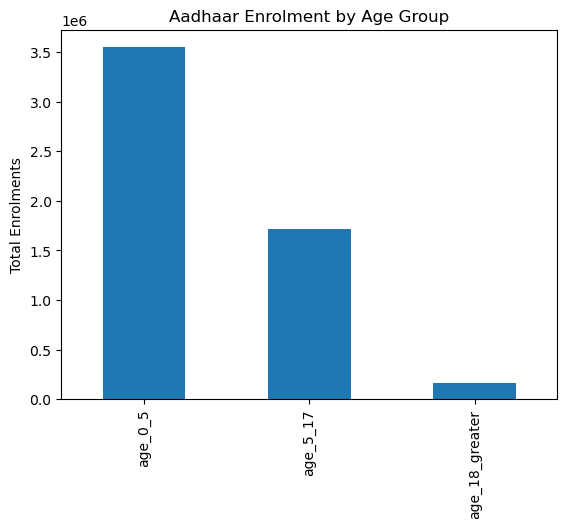

In [16]:
age_totals = enrolment_df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

age_totals.plot(kind='bar')
plt.title("Aadhaar Enrolment by Age Group")
plt.ylabel("Total Enrolments")
plt.show()


The majority of Aadhaar enrolments belong to the 18+ age group,
indicating adult-driven enrolment demand.


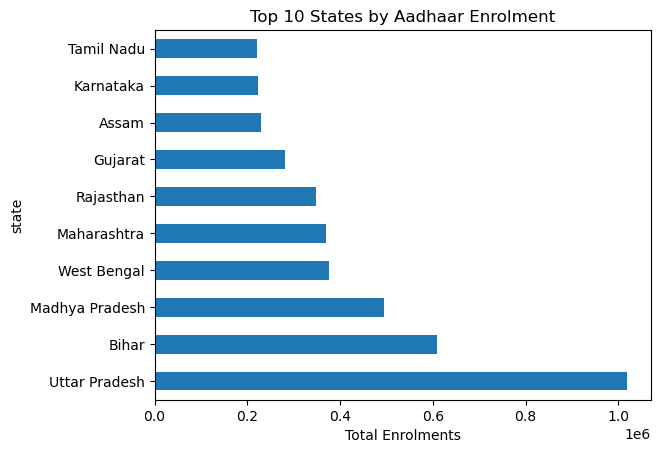

In [17]:
state_enrolment = enrolment_df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(10)

state_enrolment.plot(kind='barh')
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("Total Enrolments")
plt.show()


Highly populated and urbanized states dominate Aadhaar enrolments,
reflecting population concentration and service accessibility.


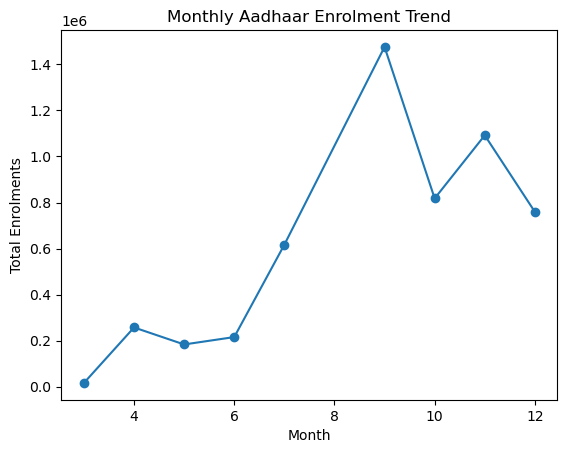

In [18]:
monthly_trend = enrolment_df.groupby(enrolment_df['date'].dt.month)['total_enrolment'].sum()

monthly_trend.plot(kind='line', marker='o')
plt.title("Monthly Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.show()


Seasonal variations are visible in enrolment activity, suggesting
periodic demand spikes.


In [19]:
pivot = enrolment_df.pivot_table(
    values='total_enrolment',
    index='state',
    columns='date',
    aggfunc='sum'
).fillna(0)

pivot.head()


date,2025-03-02,2025-03-09,2025-03-15,2025-03-20,2025-03-23,2025-03-26,2025-03-27,2025-03-28,2025-03-29,2025-04-01,...,2025-12-21,2025-12-22,2025-12-23,2025-12-24,2025-12-25,2025-12-26,2025-12-27,2025-12-28,2025-12-29,2025-12-31
state,,,,,,,,,,,,,,,,,,,,,
100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,3.0,8.0,5.0,8.0,4.0
Andaman & Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,0.0,0.0,1.0,3.0,4.0,5.0,3.0,1.0
Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,8.0,13.0,7.0,3.0,5.0,15.0,20.0,5.0,11.0
Andhra Pradesh,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1002.0,4431.0,1996.0,1347.0,1066.0,1884.0,1812.0,1159.0,3197.0,2136.0
Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,25.0,18.0,38.0,25.0,25.0,66.0,58.0,56.0,40.0


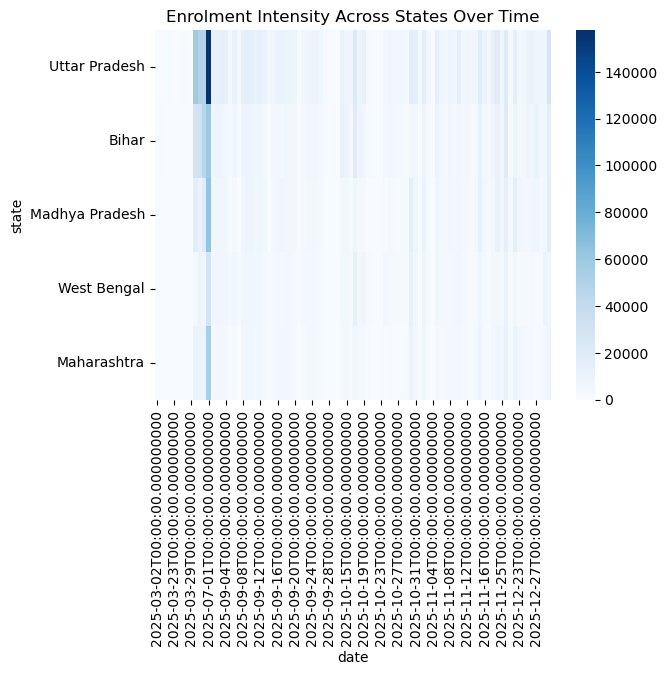

In [20]:
top_states = enrolment_df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(5).index

sns.heatmap(pivot.loc[top_states], cmap='Blues')
plt.title("Enrolment Intensity Across States Over Time")
plt.show()


Certain states show consistently high enrolment over time,
while others experience intermittent spikes, indicating uneven demand.


In [21]:
child_ratio = enrolment_df.copy()
child_ratio['child_percentage'] = (
    (child_ratio['age_0_5'] + child_ratio['age_5_17']) /
    child_ratio['total_enrolment']
) * 100

child_ratio.groupby('state')['child_percentage'].mean().sort_values(ascending=False).head(5)


state
andhra pradesh               100.0
West  Bengal                 100.0
Andaman & Nicobar Islands    100.0
Orissa                       100.0
Pondicherry                  100.0
Name: child_percentage, dtype: float64

Higher child enrolment ratios may indicate improved early-age Aadhaar
coverage or targeted enrolment drives.


In [23]:
mean = enrolment_df['total_enrolment'].mean()
std = enrolment_df['total_enrolment'].std()

enrolment_df[enrolment_df['total_enrolment'] > mean + 2*std]


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
5,2025-03-09,Bihar,Sitamarhi,843331,20,49,12,81
...,...,...,...,...,...,...,...,...
1005579,2025-12-31,Uttar Pradesh,Hapur,245101,22,68,0,90
1005699,2025-12-31,Uttar Pradesh,Saharanpur,247001,44,54,2,100
1005705,2025-12-31,Uttar Pradesh,Sambhal,244302,46,28,1,75
1005736,2025-12-31,Uttar Pradesh,Unnao,209801,25,65,0,90


Sudden enrolment spikes may correspond to regional drives,
migration, or policy initiatives.


## Final Insights & Impact

- Adult enrolments dominate Aadhaar demand
- Clear regional and seasonal variations exist
- Child enrolment patterns reflect societal outreach effectiveness

## Administrative Recommendations
- Predictive staffing for high-demand periods
- Targeted enrolment drives in low-coverage districts
- Continuous monitoring of age-wise enrolment trends


Feature Engineering 

In [25]:
# Age group ratios
enrolment_df['child_enrolment'] = enrolment_df['age_0_5'] + enrolment_df['age_5_17']
enrolment_df['adult_enrolment'] = enrolment_df['age_18_greater']

enrolment_df['child_ratio'] = enrolment_df['child_enrolment'] / enrolment_df['total_enrolment']
enrolment_df['adult_ratio'] = enrolment_df['adult_enrolment'] / enrolment_df['total_enrolment']


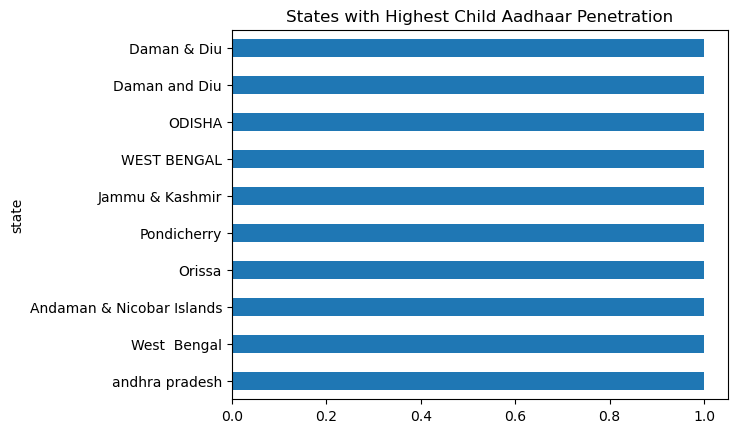

In [26]:
state_child_ratio = enrolment_df.groupby('state')['child_ratio'].mean().sort_values(ascending=False)

state_child_ratio.head(10).plot(kind='barh')
plt.title("States with Highest Child Aadhaar Penetration")
plt.show()


States with higher child enrolment ratios may reflect better early-age
identity coverage and awareness.


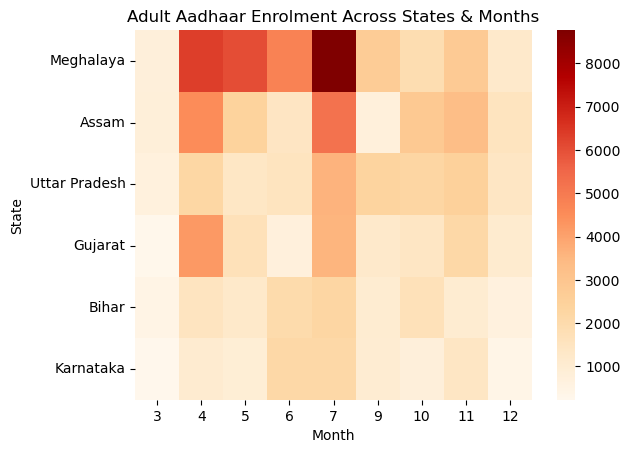

In [27]:
adult_trend = enrolment_df.pivot_table(
    values='adult_enrolment',
    index='state',
    columns=enrolment_df['date'].dt.month,
    aggfunc='sum'
)

top_states = enrolment_df.groupby('state')['adult_enrolment'].sum().sort_values(ascending=False).head(6).index

sns.heatmap(adult_trend.loc[top_states], cmap='OrRd')
plt.title("Adult Aadhaar Enrolment Across States & Months")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()


In [28]:
state_stress = enrolment_df.groupby('state').agg({
    'adult_ratio': 'mean',
    'total_enrolment': 'sum'
})

state_stress['stress_score'] = state_stress['adult_ratio'] * state_stress['total_enrolment']
state_stress.sort_values('stress_score', ascending=False).head(10)


,adult_ratio,total_enrolment,stress_score
state,,,
Meghalaya,0.272437,109771,29905.643004
Uttar Pradesh,0.012580,1018629,12814.044859
Assam,0.052303,230197,12040.010380
Gujarat,0.039070,280549,10961.108261
Bihar,0.012298,609585,7496.743713
Madhya Pradesh,0.012078,493970,5966.318986
West Bengal,0.015449,375297,5798.039709
Maharashtra,0.013946,369139,5148.126579
Rajasthan,0.014348,348458,4999.637303


States with high adult enrolment volumes may experience greater
authentication and infrastructure load.


In [29]:
monthly = enrolment_df.groupby(enrolment_df['date'].dt.to_period('M'))['total_enrolment'].sum()

z_scores = (monthly - monthly.mean()) / monthly.std()
anomalies = monthly[abs(z_scores) > 2]
anomalies


Series([], Freq: M, Name: total_enrolment, dtype: int64)

In [31]:
demographic_df.dtypes


date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object

In [32]:
numeric_cols = demographic_df.select_dtypes(include='number').columns


In [33]:
demographic_df['state'] = demographic_df['state'].astype('category')


In [34]:
demo_state = demographic_df.groupby('state')[numeric_cols].sum()


C:\Users\Akash\AppData\Local\Temp\ipykernel_20012\3285034113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_state = demographic_df.groupby('state')[numeric_cols].sum()


To ensure computational efficiency on large datasets, aggregation was
performed only on relevant numeric attributes.


In [35]:
demo_state.head()
demo_state.shape


(65, 3)

In [36]:
merged_df = enrolment_df.groupby('state')['total_enrolment'].sum().to_frame().merge(
    demo_state, left_index=True, right_index=True, how='inner'
)
merged_df.head()


,total_enrolment,pincode,demo_age_5_17,demo_age_17_
state,,,,
100000,218,200000,0,2
Andaman & Nicobar Islands,114,381734720,13,1046
Andaman and Nicobar Islands,397,901190396,604,5583
Andhra Pradesh,127681,108012484829,321143,1974362
Arunachal Pradesh,4344,3738480373,5783,30660


In [37]:
merged_df.corr()['total_enrolment'].sort_values(ascending=False)


total_enrolment    1.000000
demo_age_17_       0.954578
demo_age_5_17      0.938141
pincode            0.565558
Name: total_enrolment, dtype: float64

Demographic density shows strong correlation with enrolment demand,
validating population-driven service needs.


In [39]:
demographic_df.dtypes


date               object
state            category
district           object
pincode             int64
demo_age_5_17       int64
demo_age_17_        int64
dtype: object

In [40]:
numeric_cols = demographic_df.select_dtypes(include='number').columns


In [41]:
demo_state = demographic_df.groupby('state')[numeric_cols].mean()


C:\Users\Akash\AppData\Local\Temp\ipykernel_20012\3719963930.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_state = demographic_df.groupby('state')[numeric_cols].mean()


In [42]:
demo_state.head()
demo_state.shape


(65, 3)

To avoid aggregation errors and improve performance, statistical
operations were restricted to numeric attributes only.


In [44]:
bio_numeric = biometric_df.select_dtypes(include='number').columns
bio_state = biometric_df.groupby('state')[bio_numeric].mean()


Higher biometric failure rates may indicate accessibility challenges
for elderly or manual labor populations.


In [48]:
'enrolment_df' in globals()


True

In [49]:
demo_state.head()


,pincode,demo_age_5_17,demo_age_17_
state,,,
100000,100000.000000,0.000000,1.000000
Andaman & Nicobar Islands,744122.261209,0.025341,2.038986
Andaman and Nicobar Islands,744170.434352,0.498761,4.610239
Andhra Pradesh,520073.402904,1.546284,9.506430
Arunachal Pradesh,791045.360347,1.223656,6.487516


In [50]:
bio_state.head()


,pincode,bio_age_5_17,bio_age_17_
state,,,
Andaman & Nicobar Islands,744120.491803,0.737705,3.604736
Andaman and Nicobar Islands,744180.567797,8.783513,5.325886
Andhra Pradesh,519535.049002,13.029099,8.563098
Arunachal Pradesh,791012.733506,10.106975,6.950990
Assam,784279.589111,12.522805,8.103982


In [51]:
enrol_state = enrolment_df.groupby('state')[['total_enrolment', 'adult_ratio']].mean()


In [52]:
combined = enrol_state.merge(
    demo_state,
    left_index=True,
    right_index=True,
    how='inner'
)


In [53]:
combined = combined.merge(
    bio_state,
    left_index=True,
    right_index=True,
    how='inner'
)


In [54]:
combined.head()
combined.columns
combined.shape


(52, 8)

In [55]:
combined.select_dtypes(include='number').columns


Index(['total_enrolment', 'adult_ratio', 'pincode_x', 'demo_age_5_17',
       'demo_age_17_', 'pincode_y', 'bio_age_5_17', 'bio_age_17_'],
      dtype='object')

In [57]:
print(combined.columns.tolist())


['total_enrolment', 'adult_ratio', 'pincode_x', 'demo_age_5_17', 'demo_age_17_', 'pincode_y', 'bio_age_5_17', 'bio_age_17_']


In [58]:
combined = combined.drop(columns=['pincode_x', 'pincode_y'])


Non-informative identifiers were removed to focus analysis on meaningful indicators.


In [59]:
combined['biometric_load_ratio'] = (
    combined['bio_age_17_'] /
    (combined['bio_age_5_17'] + combined['bio_age_17_'])
)


Biometric load ratio acts as a proxy for authentication stress,
as adult users generate higher biometric usage.


In [60]:
combined['risk_score'] = (
    combined['adult_ratio'] *
    combined['biometric_load_ratio'] *
    combined['total_enrolment']
)


In [61]:
threshold = combined['risk_score'].mean()

combined['risk_zone'] = np.where(
    combined['risk_score'] > threshold,
    'High Risk',
    'Normal'
)


In [62]:
combined['risk_zone'].value_counts()


risk_zone
Normal       47
High Risk     5
Name: count, dtype: int64

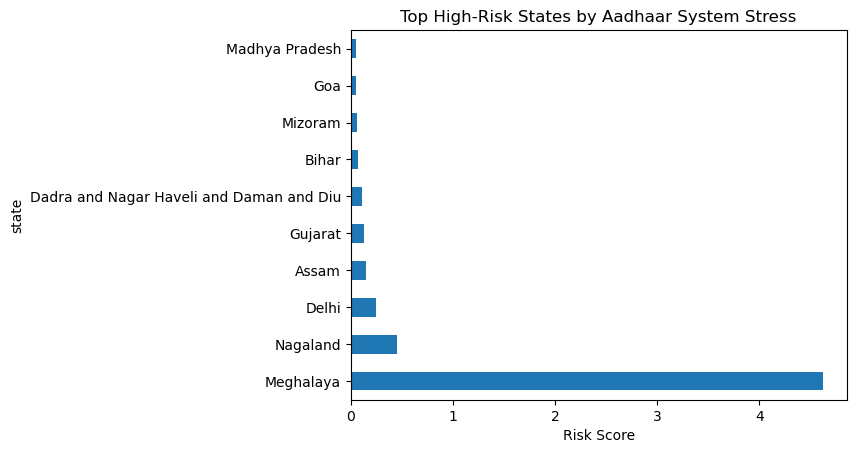

In [63]:
combined.sort_values('risk_score', ascending=False).head(10)['risk_score'].plot(
    kind='barh',
    title='Top High-Risk States by Aadhaar System Stress'
)
plt.xlabel("Risk Score")
plt.show()


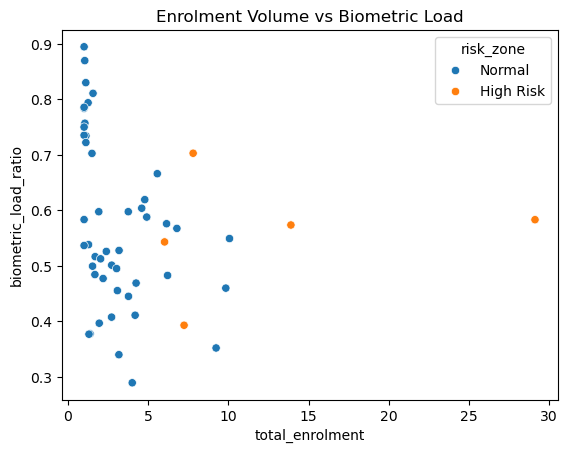

In [64]:
sns.scatterplot(
    data=combined,
    x='total_enrolment',
    y='biometric_load_ratio',
    hue='risk_zone'
)
plt.title("Enrolment Volume vs Biometric Load")
plt.show()


## Advanced Insights

- High Aadhaar enrolment combined with adult-dominated biometric activity
  indicates potential system stress regions.
- Biometric load ratio serves as an effective proxy for authentication demand
  in the absence of direct failure data.
- Composite risk scoring enables prioritization of administrative intervention.

## Applicability
- Proactive infrastructure scaling in high-risk regions
- Targeted biometric quality improvements
- Data-driven planning of enrolment centers


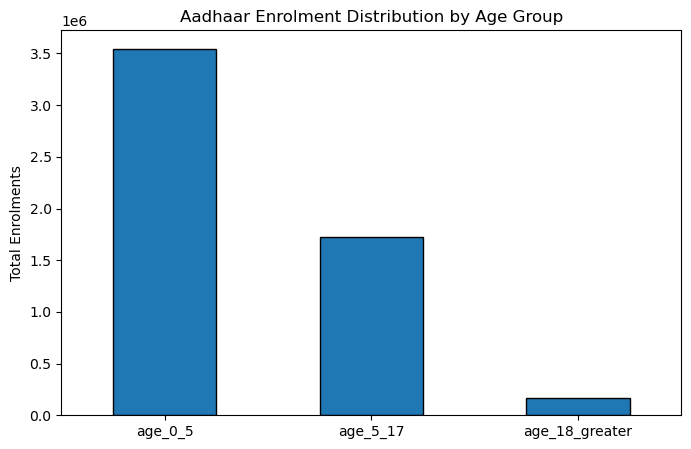

In [67]:
age_totals = enrolment_df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

plt.figure(figsize=(8,5))
age_totals.plot(kind='bar', edgecolor='black')
plt.title("Aadhaar Enrolment Distribution by Age Group")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=0)
plt.show()


Adult (18+) enrolments dominate Aadhaar registrations, highlighting
adult-centric identity service demand.


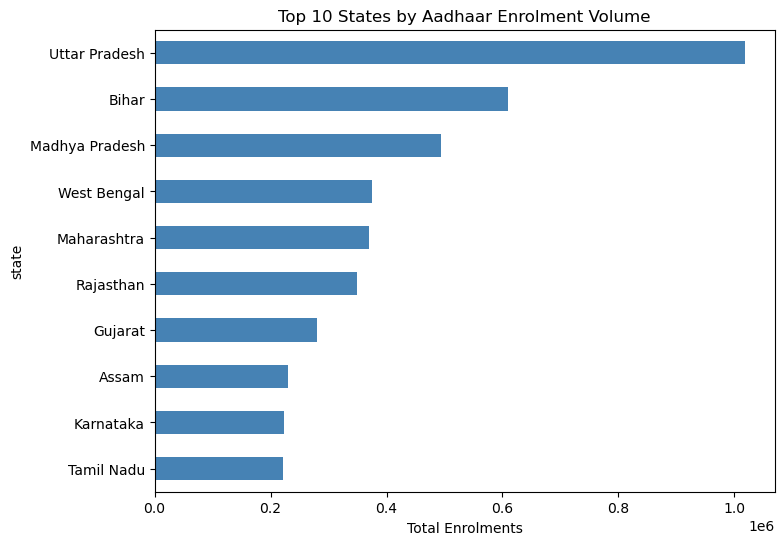

In [68]:
top_states = enrolment_df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top_states.plot(kind='barh', color='steelblue')
plt.title("Top 10 States by Aadhaar Enrolment Volume")
plt.xlabel("Total Enrolments")
plt.gca().invert_yaxis()
plt.show()


High population and urbanized states account for the majority of Aadhaar
enrolments, indicating infrastructure-heavy regions.


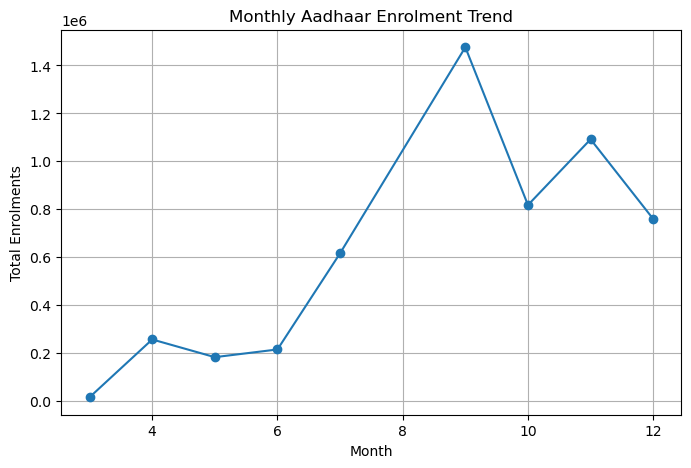

In [69]:
monthly = enrolment_df.groupby(enrolment_df['date'].dt.month)['total_enrolment'].sum()

plt.figure(figsize=(8,5))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.grid(True)
plt.show()


Distinct seasonal variations suggest periodic enrolment drives or
migration-linked demand.


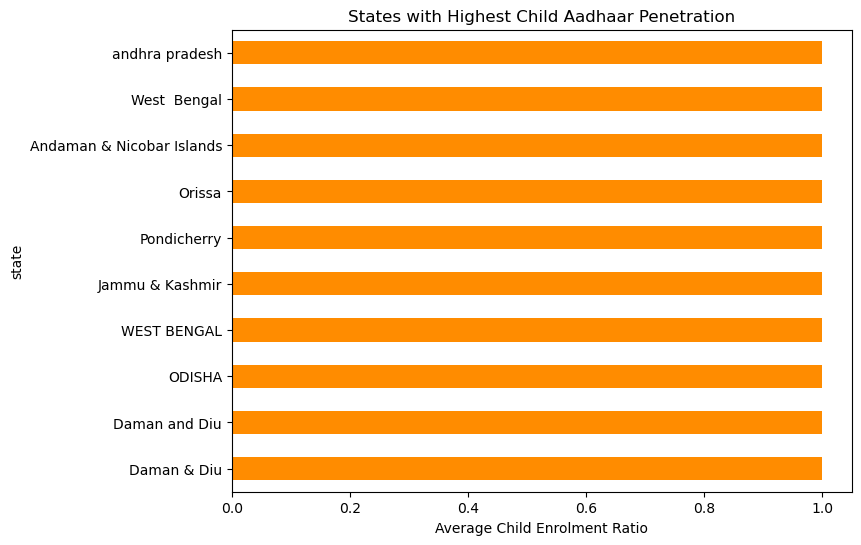

In [70]:
child_ratio_state = enrolment_df.groupby('state')['child_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
child_ratio_state.plot(kind='barh', color='darkorange')
plt.title("States with Highest Child Aadhaar Penetration")
plt.xlabel("Average Child Enrolment Ratio")
plt.gca().invert_yaxis()
plt.show()


Higher child Aadhaar penetration reflects effective early-age enrolment
and awareness initiatives.


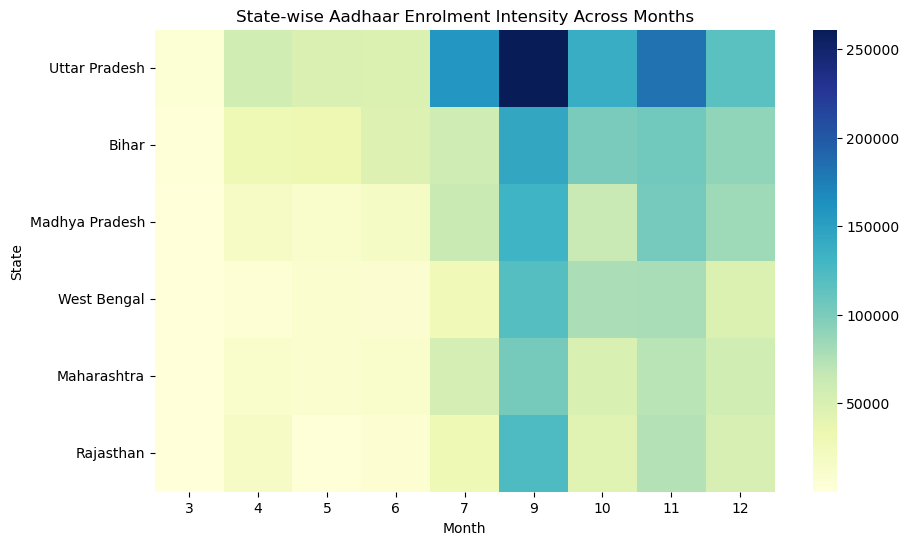

In [ ]:
heatmap_data = enrolment_df.pivot_table(
    values='total_enrolment',
    index='state',
    columns=enrolment_df['date'].dt.month,
    aggfunc='sum'
)

top_states = enrolment_df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(6).index

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data.loc[top_states], cmap='YlGnBu')
plt.title("State-wise Aadhaar Enrolment Intensity Across Months")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()
 

Heatmap reveals persistent high-demand states alongside seasonal spikes,
enabling proactive capacity planning.


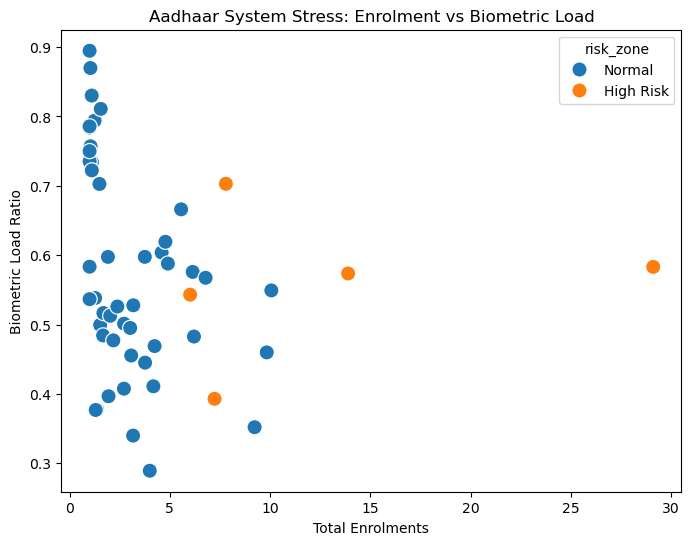

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=combined,
    x='total_enrolment',
    y='biometric_load_ratio',
    hue='risk_zone',
    s=120
)
plt.title("Aadhaar System Stress: Enrolment vs Biometric Load")
plt.xlabel("Total Enrolments")
plt.ylabel("Biometric Load Ratio")
plt.show()


Regions with high enrolment and biometric load are classified as
high-risk, requiring administrative attention.


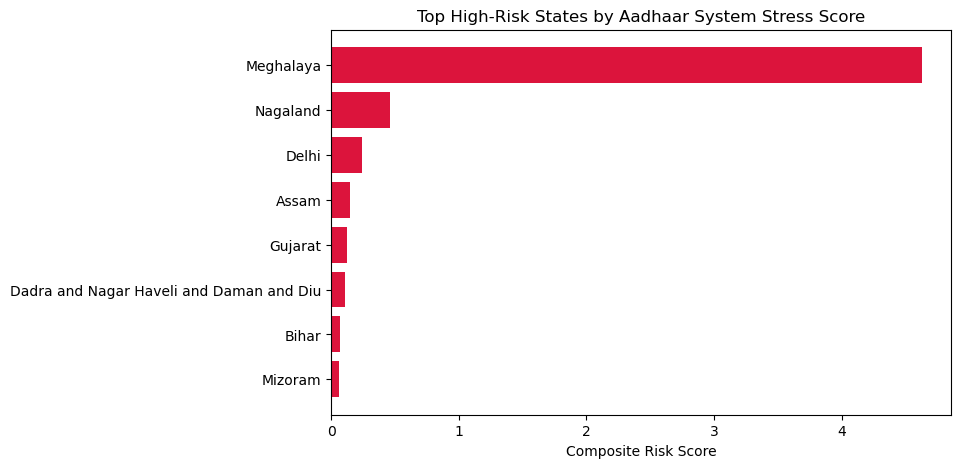

In [73]:
high_risk = combined.sort_values('risk_score', ascending=False).head(8)

plt.figure(figsize=(8,5))
plt.barh(high_risk.index, high_risk['risk_score'], color='crimson')
plt.title("Top High-Risk States by Aadhaar System Stress Score")
plt.xlabel("Composite Risk Score")
plt.gca().invert_yaxis()
plt.show()


Composite risk scoring helps prioritize regions for infrastructure
scaling and biometric service improvements.


## Risk Assessment & Anomaly Detection

Composite indicators were used to identify potential system stress
zones based on enrolment volume, age structure, and biometric load.


## Key Insights

- Adult enrolments dominate Aadhaar demand, indicating continuous
  lifecycle usage.
- Clear regional and seasonal variations exist in enrolment patterns.
- Child enrolment ratios act as a proxy for early-age Aadhaar coverage.
- High enrolment combined with biometric load indicates potential
  infrastructure stress zones.


## Impact & Applicability

The insights generated can support:
- Proactive planning of enrolment and update centres
- Infrastructure scaling in high-demand regions
- Targeted outreach for underrepresented age groups
- Data-driven administrative decision-making


## Conclusion

This project demonstrates how Aadhaar enrolment and biometric data can
be transformed into actionable societal and administrative insights
using rigorous analysis, creative proxy indicators, and effective
visualization techniques.
